# Project 2 - Prediciting Release Year of Songs on Spotify

### By: Sam Busane & Andrew Cline

## Introduction

intro goes here

## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import export_graphviz

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [5]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [6]:
df.drop(['id', 'release_date', 'name', 'artists'], axis=1, inplace=True)

In [7]:
df['decade'] = pd.cut(df['year'], bins=[1920,1929,1939,1949,1959,1969,1979,1989,1999,2009,2029], labels=['20s', '30s','40s',
                                                                                                        '50s','60s','70s',
                                                                                                        '80s', '90s', '2000s',
                                                                                                        '2010s'])

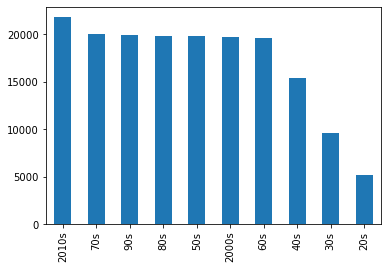

In [8]:
df['decade'].value_counts().plot.bar()

In [9]:
df = df[df['year'] >= 1940]

## Visualization 

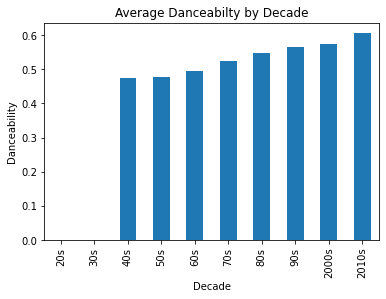

In [10]:
df.groupby('decade')['danceability'].mean().plot.bar()
plt.title('Average Danceabilty by Decade')
plt.xlabel('Decade')
plt.ylabel('Danceability');

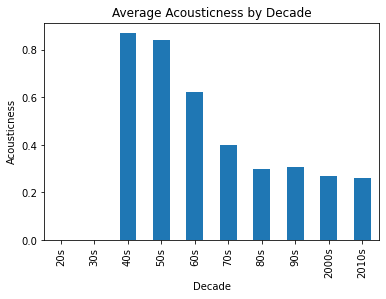

In [11]:
df.groupby('decade')['acousticness'].mean().plot.bar()
plt.title('Average Acousticness by Decade')
plt.xlabel('Decade')
plt.ylabel('Acousticness');

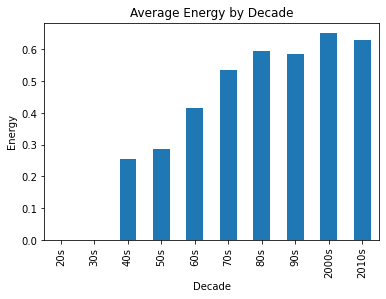

In [12]:
df.groupby('decade')['energy'].mean().plot.bar()
plt.title('Average Energy by Decade')
plt.xlabel('Decade')
plt.ylabel('Energy');

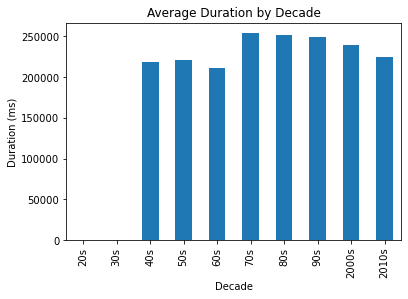

In [13]:
df.groupby('decade')['duration_ms'].mean().plot.bar()
plt.title('Average Duration by Decade')
plt.xlabel('Decade')
plt.ylabel('Duration (ms)');

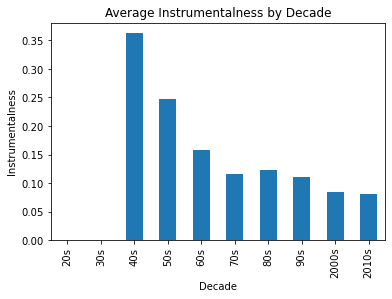

In [14]:
df.groupby('decade')['instrumentalness'].mean().plot.bar()
plt.title('Average Instrumentalness by Decade')
plt.xlabel('Decade')
plt.ylabel('Instrumentalness');

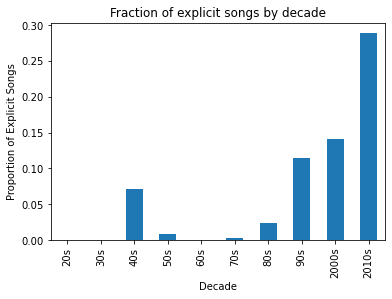

In [15]:
tbl = df.groupby('decade')['explicit'].apply(lambda x: (x == 1).mean())
tbl.plot.bar()
plt.title('Fraction of explicit songs by decade')
plt.xlabel('Decade')
plt.ylabel('Proportion of Explicit Songs');

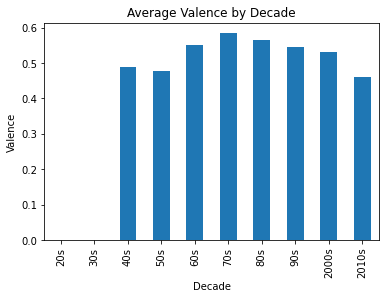

In [16]:
df.groupby('decade')['valence'].mean().plot.bar()
plt.title('Average Valence by Decade')
plt.xlabel('Decade')
plt.ylabel('Valence');

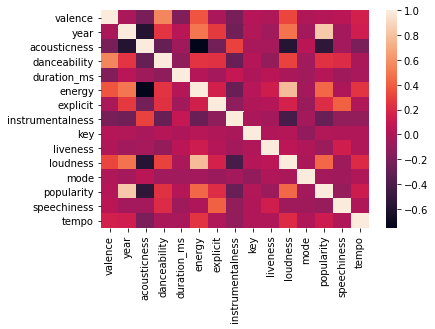

In [17]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

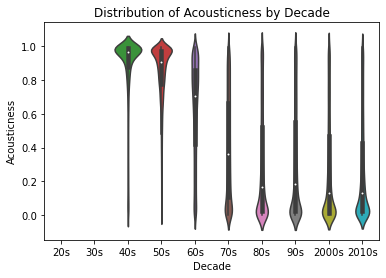

In [18]:
sns.violinplot(x='decade', y='acousticness', data=df)
plt.title('Distribution of Acousticness by Decade')
plt.xlabel('Decade')
plt.ylabel('Acousticness');

H:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


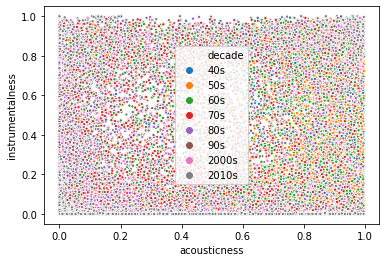

In [19]:
sns.scatterplot('acousticness', 'instrumentalness',s=10, hue='decade', data=df)

## Building the Model

In [20]:
predictors = ['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 
              'speechiness', 'popularity', 'liveness', 'loudness', 'mode', 'tempo']
X = df[predictors].values
y = df['year'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155978 entries, 3606 to 170652
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   valence           155978 non-null  float64 
 1   year              155978 non-null  int64   
 2   acousticness      155978 non-null  float64 
 3   danceability      155978 non-null  float64 
 4   duration_ms       155978 non-null  int64   
 5   energy            155978 non-null  float64 
 6   explicit          155978 non-null  int64   
 7   instrumentalness  155978 non-null  float64 
 8   key               155978 non-null  int64   
 9   liveness          155978 non-null  float64 
 10  loudness          155978 non-null  float64 
 11  mode              155978 non-null  int64   
 12  popularity        155978 non-null  int64   
 13  speechiness       155978 non-null  float64 
 14  tempo             155978 non-null  float64 
 15  decade            155978 non-null  category
dtyp

## The Models 

### Decision Tree Regressor

In [22]:
treereg = DecisionTreeRegressor(max_depth=3)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [23]:
y_predict = treereg.predict(X_test)
errors = y_test - y_predict
rmse = np.sqrt(errors**2).mean()

In [24]:
print('RMSE: {:.2f}'.format(rmse))

RMSE: 9.26


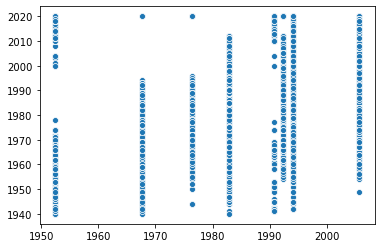

In [25]:
sns.scatterplot(x=y_predict, y=y_test)

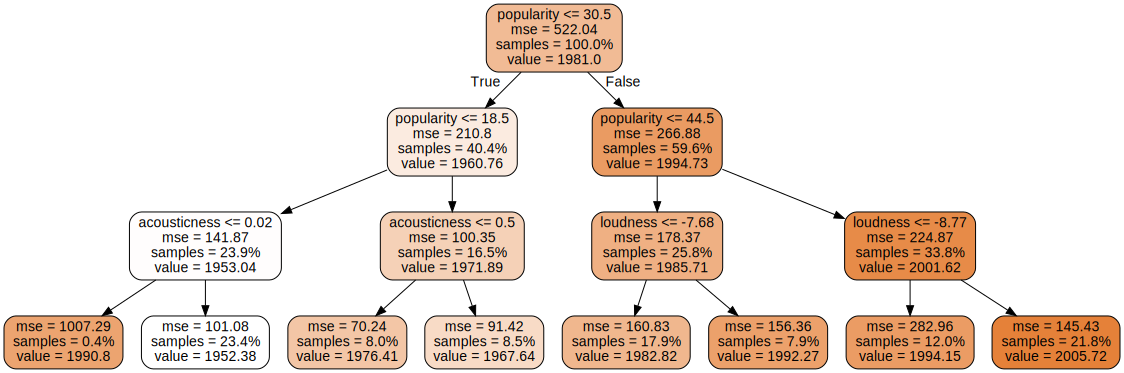

In [26]:
dot_data= export_graphviz(treereg, precision=2,feature_names=predictors,  proportion=True,filled=True, rounded=True) 

graph = graphviz.Source(dot_data)
graph

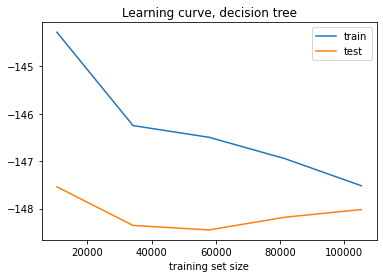

In [27]:
train_sizes, train_scores, test_scores = learning_curve(treereg, X_train, y_train, cv=10, 
                                                         scoring='neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.xlabel('training set size')
plt.title('Learning curve, decision tree')
plt.legend();

In [28]:
treereg = DecisionTreeRegressor(max_depth=5)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [29]:
y_predict = treereg.predict(X_test)
errors = y_test - y_predict
rmse = np.sqrt(errors**2).mean()

In [30]:
print('RMSE: {:.2f}'.format(rmse))

RMSE: 8.11


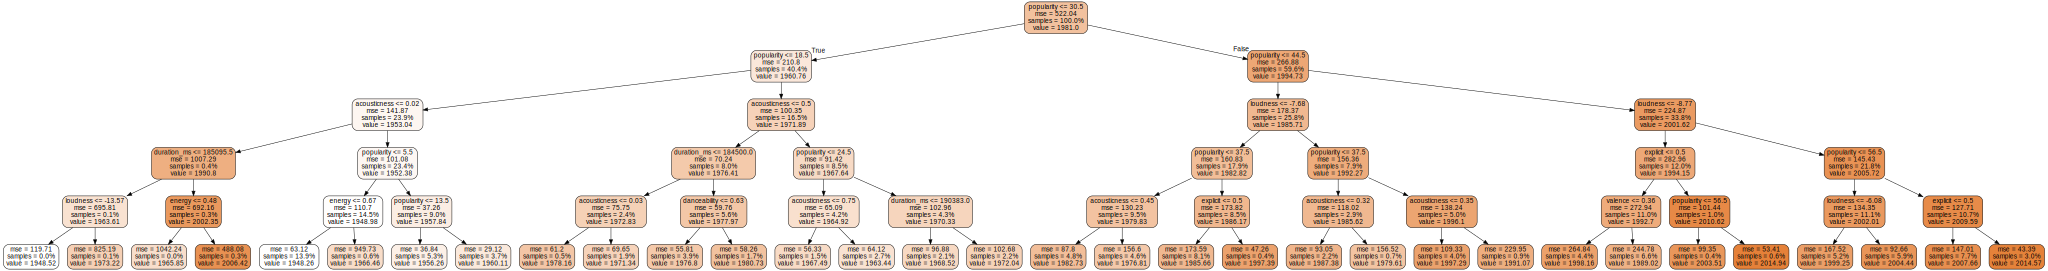

In [31]:
dot_data= export_graphviz(treereg, precision=2,feature_names=predictors,  proportion=True,filled=True, rounded=True) 

graph = graphviz.Source(dot_data)
graph

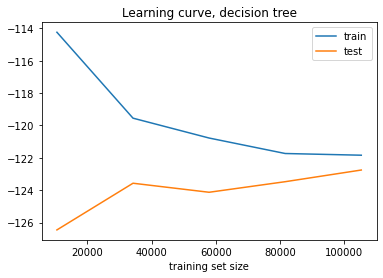

In [32]:
train_sizes, train_scores, test_scores = learning_curve(treereg, X_train, y_train, cv=10, 
                                                         scoring='neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.xlabel('training set size')
plt.title('Learning curve, decision tree')
plt.legend();

### Linear Regression

In [33]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.predict(X_test)

array([2001.4761616 , 1985.15476873, 1984.58353519, ..., 1952.20458507,
       1994.58031357, 1985.48857693])

In [34]:
y_predict = linreg.predict(X_test)
errors = y_test - y_predict
rmse = np.sqrt(errors**2).mean()

In [75]:
scores = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores.mean())
print(rmse)

12.194306568050013


In [35]:
print('RMSE: {:.2f}'.format(rmse))

RMSE: 8.47


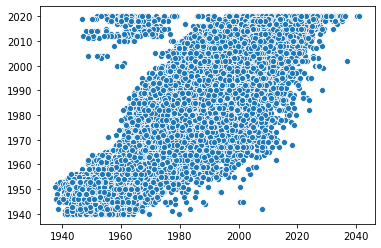

In [36]:
sns.scatterplot(x=y_predict, y=y_test)

In [37]:
y_predict.max()

2041.03380056583

#### Linear Regression with Forward Feature Selection

In [73]:
def forward_feature_selection_lr(X_train,y_train):
    remaining = list(range(X_train.shape[1]))
    selected = []
    n = 13
    while len(selected) < n:
        rmse_min = 1e7
        for i in remaining:
            X_i = X_train[:,selected+[i]]
            scores = cross_val_score(LinearRegression(), X_i, y_train, scoring='neg_mean_squared_error', cv=10)
            rmse = np.sqrt(-scores.mean())
            if rmse < rmse_min:
                rmse_min = rmse
                i_min = i
       	 
        remaining.remove(i_min)
        selected.append(i_min)
        print('num features: {}; rmse: {:.2f}'.format(len(selected), rmse_min))
    return selected



In [74]:
best_array=forward_feature_selection_lr(X_train,y_train)

num features: 1; rmse: 12.48
num features: 2; rmse: 11.91
num features: 3; rmse: 11.77
num features: 4; rmse: 11.62
num features: 5; rmse: 11.46
num features: 6; rmse: 11.41
num features: 7; rmse: 11.39
num features: 8; rmse: 11.37
num features: 9; rmse: 11.36
num features: 10; rmse: 11.36
num features: 11; rmse: 11.35
num features: 12; rmse: 11.35
num features: 13; rmse: 11.35


In [72]:
feature_names=[]
for i in best_array:
    feature_names.append(predictors[i])
feature_names

['popularity',
 'acousticness',
 'valence',
 'danceability',
 'energy',
 'explicit',
 'loudness',
 'instrumentalness',
 'tempo',
 'speechiness']

### KNN Regressor - BAD

In [38]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [39]:
y_predict = knn.predict(X_test)
errors = y_test - y_predict
rmse = np.sqrt(errors**2).mean()

In [40]:
print('RMSE: {:.2f}'.format(rmse))

RMSE: 12.50


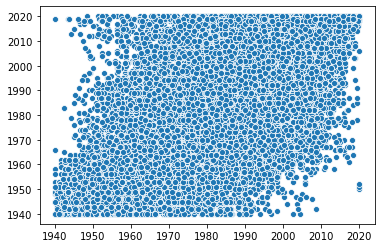

In [41]:
sns.scatterplot(x=y_predict, y=y_test)